In [54]:
from load import LoadSoundDataset

data_highpass = LoadSoundDataset('./Datasets/highpass_dataset.csv')
data_base = LoadSoundDataset('./Datasets/base_dataset.csv')
print(data_highpass.X_train.shape,data_highpass.X_test.shape)
print(data_base.X_train.shape,data_base.X_test.shape)
data_aug_base = LoadSoundDataset('./Datasets/aug_base_dataset.csv',sample_per_actor=240)
data_aug_highpass = LoadSoundDataset('./Datasets/aug_highpass_dataset.csv',sample_per_actor=240)
print(data_aug_base.X_train.shape,data_aug_base.X_test.shape)
print(data_aug_highpass.X_train.shape,data_aug_highpass.X_test.shape)

(1080, 45, 1) (360, 45, 1)
(1080, 45, 1) (360, 45, 1)
(4320, 45, 1) (1440, 45, 1)
(4320, 45, 1) (1440, 45, 1)


In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=10)
selected_features = selector.fit_transform(data_base.X_train[:,:,0], data_base.y_train)
f_score_indexes = (-selector.scores_).argsort()[:10]
print(np.sort(f_score_indexes))

selected_features = selector.fit_transform(data_highpass.X_train[:,:,0], data_highpass.y_train)
f_score_indexes = (-selector.scores_).argsort()[:10]
print(np.sort(f_score_indexes))

selected_features = selector.fit_transform(data_aug_base.X_train[:,:,0], data_aug_base.y_train)
f_score_indexes = (-selector.scores_).argsort()[:10]
print(np.sort(f_score_indexes))

selected_features = selector.fit_transform(data_aug_highpass.X_train[:,:,0], data_aug_highpass.y_train)
f_score_indexes = (-selector.scores_).argsort()[:10]
print(np.sort(f_score_indexes))

[1,3,6,8,9,11,12,14,28]


[ 1  6  7  8  9 10 11 12 14 28]
[ 1  3  4  6  7  8  9 12 28 43]
[ 1  6  8  9 10 11 12 14 16 28]
[ 1  3  4  6 11 12 15 18 30 39]


[1, 3, 6, 8, 9, 11, 12, 14, 28]

In [56]:
import tensorflow as tf

import numpy as np

from tensorflow import keras
from tensorflow.keras.layers import Conv1D,Dense,Dropout,MaxPooling1D,Activation,BatchNormalization,Flatten
from tensorflow.keras import models
from tensorflow.keras.callbacks import CSVLogger

import matplotlib.pyplot as plt

In [57]:
def get_model():
    model = models.Sequential()
    model.add(Conv1D(
        16, 7, input_shape=(9,1), activation='relu', padding='same', strides=2))
    model.add(Conv1D(
        32, 5, activation='relu', padding='same', strides=2))
    model.add(Conv1D(
        32, 3, activation='relu', padding='same', strides=2))
    model.add(Dropout(0.25))
    model.add(Conv1D(
        64, 3, activation='relu', padding='same', strides=2))
    model.add(Conv1D(
        64, 3, activation='relu', padding='same', strides=2))
    model.add(Dropout(0.25))
    model.add(Conv1D(
        128, 3, activation='relu', padding='same', strides=2))
    model.add(Conv1D(
        128, 3, activation='relu', padding='same', strides=2))
    model.add(Dropout(0.1))

    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8,activation='softmax'))

    opt = keras.optimizers.RMSprop(lr=0.001)
    model.compile(optimizer=opt, metrics='accuracy',loss='sparse_categorical_crossentropy')
    
    return model

In [58]:
class Training():
    def __init__(self,data,model,tid):
        self.data = data
        self.model = model
        self.tid = tid

    def run(self,):
        lr_reduce = keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.9,
            patience=20,
            min_lr=0.0001)
        csv_logger = keras.callbacks.CSVLogger(
            './Exported_model/'+self.tid+'.log', separator=';', append=False)
        es_callback = keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=3)
        self.model.fit(
            self.data.X_train,
            self.data.y_train,
            batch_size=32,
            epochs=150,
            validation_data=(self.data.X_test, self.data.y_test),
            callbacks=[lr_reduce,csv_logger],
            shuffle=False)
        self.model.save('./Exported_model/'+self.tid+'.h5')

model_list = {
    'base_model':Training(data_base,get_model(),'base_model'),
    'highpass_model':Training(data_highpass,get_model(),'highpass_model'),
    'aug_base_model':Training(data_aug_base,get_model(),'aug_base_model'),
    'aug_highpass_model':Training(data_aug_highpass,get_model(),'aug_highpass_model') }

In [53]:
model_list['base_model'].run()

========] - 0s 4ms/step - loss: 1.2999 - accuracy: 0.5019 - val_loss: 1.7196 - val_accuracy: 0.3972 - lr: 0.0010
Epoch 26/150
34/34 [==============================] - 0s 5ms/step - loss: 1.3086 - accuracy: 0.5139 - val_loss: 1.7180 - val_accuracy: 0.3944 - lr: 0.0010
Epoch 27/150
34/34 [==============================] - 0s 4ms/step - loss: 1.2928 - accuracy: 0.5194 - val_loss: 1.7020 - val_accuracy: 0.4000 - lr: 0.0010
Epoch 28/150
34/34 [==============================] - 0s 5ms/step - loss: 1.2747 - accuracy: 0.5194 - val_loss: 1.7450 - val_accuracy: 0.3917 - lr: 0.0010
Epoch 29/150
34/34 [==============================] - 0s 4ms/step - loss: 1.2836 - accuracy: 0.5241 - val_loss: 1.7251 - val_accuracy: 0.4000 - lr: 0.0010
Epoch 30/150
34/34 [==============================] - 0s 4ms/step - loss: 1.2554 - accuracy: 0.5324 - val_loss: 1.8144 - val_accuracy: 0.3889 - lr: 0.0010
Epoch 31/150
34/34 [==============================] - 0s 4ms/step - loss: 1.2474 - accuracy: 0.5278 - val_loss: 

In [6]:
model_list['highpass_model'].run()

 0s 5ms/step - loss: 0.7437 - accuracy: 0.7139 - val_loss: 2.2543 - val_accuracy: 0.3417 - lr: 0.0010
Epoch 26/150
34/34 [==============================] - 0s 5ms/step - loss: 0.7160 - accuracy: 0.7315 - val_loss: 2.4679 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 27/150
34/34 [==============================] - 0s 5ms/step - loss: 0.6601 - accuracy: 0.7481 - val_loss: 2.3418 - val_accuracy: 0.3556 - lr: 0.0010
Epoch 28/150
34/34 [==============================] - 0s 5ms/step - loss: 0.6740 - accuracy: 0.7593 - val_loss: 2.5323 - val_accuracy: 0.3583 - lr: 0.0010
Epoch 29/150
34/34 [==============================] - 0s 5ms/step - loss: 0.6122 - accuracy: 0.7657 - val_loss: 2.4857 - val_accuracy: 0.3389 - lr: 0.0010
Epoch 30/150
34/34 [==============================] - 0s 5ms/step - loss: 0.5977 - accuracy: 0.7843 - val_loss: 2.5090 - val_accuracy: 0.3417 - lr: 0.0010
Epoch 31/150
34/34 [==============================] - 0s 5ms/step - loss: 0.5731 - accuracy: 0.7907 - val_loss: 2.6093 - va

In [7]:
model_list['aug_base_model'].run()

5/135 [==============================] - 1s 5ms/step - loss: 0.4750 - accuracy: 0.8396 - val_loss: 2.5789 - val_accuracy: 0.4333 - lr: 9.0000e-04
Epoch 28/150
135/135 [==============================] - 1s 4ms/step - loss: 0.4959 - accuracy: 0.8380 - val_loss: 2.6344 - val_accuracy: 0.4340 - lr: 9.0000e-04
Epoch 29/150
135/135 [==============================] - 1s 4ms/step - loss: 0.4742 - accuracy: 0.8350 - val_loss: 2.7381 - val_accuracy: 0.4313 - lr: 9.0000e-04
Epoch 30/150
135/135 [==============================] - 1s 4ms/step - loss: 0.4593 - accuracy: 0.8449 - val_loss: 2.7080 - val_accuracy: 0.4236 - lr: 9.0000e-04
Epoch 31/150
135/135 [==============================] - 1s 4ms/step - loss: 0.4414 - accuracy: 0.8449 - val_loss: 2.7780 - val_accuracy: 0.4236 - lr: 9.0000e-04
Epoch 32/150
135/135 [==============================] - 1s 4ms/step - loss: 0.4336 - accuracy: 0.8521 - val_loss: 2.8425 - val_accuracy: 0.4486 - lr: 9.0000e-04
Epoch 33/150
135/135 [===========================

In [8]:
model_list['aug_highpass_model'].run()

5/135 [==============================] - 1s 4ms/step - loss: 0.5492 - accuracy: 0.8046 - val_loss: 3.4337 - val_accuracy: 0.3729 - lr: 9.0000e-04
Epoch 28/150
135/135 [==============================] - 1s 4ms/step - loss: 0.5155 - accuracy: 0.8134 - val_loss: 3.1446 - val_accuracy: 0.3889 - lr: 9.0000e-04
Epoch 29/150
135/135 [==============================] - 1s 4ms/step - loss: 0.4959 - accuracy: 0.8192 - val_loss: 3.3535 - val_accuracy: 0.3736 - lr: 9.0000e-04
Epoch 30/150
135/135 [==============================] - 1s 4ms/step - loss: 0.4979 - accuracy: 0.8257 - val_loss: 3.3991 - val_accuracy: 0.3757 - lr: 9.0000e-04
Epoch 31/150
135/135 [==============================] - 1s 5ms/step - loss: 0.4925 - accuracy: 0.8194 - val_loss: 3.8474 - val_accuracy: 0.3639 - lr: 9.0000e-04
Epoch 32/150
135/135 [==============================] - 1s 5ms/step - loss: 0.4817 - accuracy: 0.8329 - val_loss: 3.6961 - val_accuracy: 0.3583 - lr: 9.0000e-04
Epoch 33/150
135/135 [===========================

In [60]:
import pandas as pd

paths = {
    'aug_base_model':'./Exported_model/aug_base_model.log',
    'aug_highpass_model':'./Exported_model/aug_highpass_model.log',
    'base_model':'./Exported_model/base_model.log',
    'highpass_model':'./Exported_model/highpass_model.log'}

graphs = { key:pd.read_csv(v, sep=';') for key,v in paths.items() }

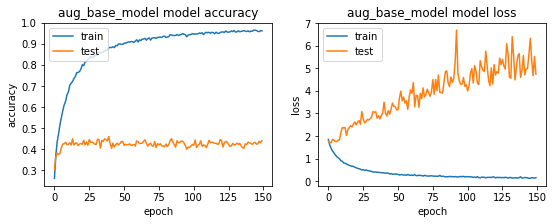

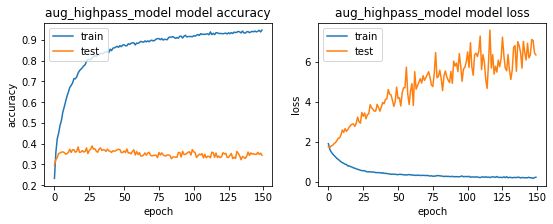

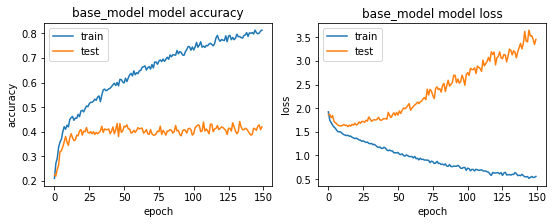

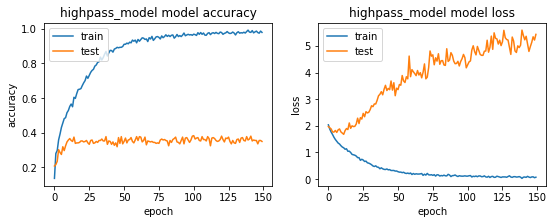

In [61]:
for key,i in graphs.items():
    plt.figure(figsize=(9, 3))

    plt.subplot(121)
    plt.plot(i['accuracy'])
    plt.plot(i['val_accuracy'])
    plt.title(key+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    # summarize history for loss
    plt.subplot(122)
    plt.plot(i['loss'])
    plt.plot(i['val_loss'])
    plt.title(key+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()